**research project1:**

Investigate the specific relationship between non-English speaking, and educational attainment, employment within the context of Los Angeles County:
This project researches how non-English speaking impact social equity,  which addresses these disparities to inform strategies  and promote pathways to equality of education and employment.  



**Do limited English households face challenges in accessing educational levels and employment?**

**do non-english speaking households have spatial autocorrelation within the regions?**


**Examine non-english language spatial variation.**

**objective:** analysisng the spatial distribution and variation of non-english households across different regions.

**Approach:** utilizing ANOVA analysis to invetigate spatial variation of non-english speaking households.

**Investigate Non-English Language Household Spatial Autocorrelation**

**Objective:** Explore the spatial relationships or clustering tendencies among non-English speaking households.

**`Approach:`** Operating Moran's I to asscess the spatial autocorrelation of non-english speaking households.


**Explore language-education-employement correlation**

**Objective:** Understanding the relationship between the language spoken(english limit), education attatinment, and employment.

**Approach:** Develop OLS and Spatial Weight Regression to investigate correlation among with non-english languages, educations levels, and employment rate

#setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas shapely fiona pyproj rtree contextily mapclassify pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 26.8 MB

In [ ]:
! pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from shapely.geometry import box
import geopandas as gpd
import fiona
import pingouin as pg
import seaborn as sns
from scipy import stats
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local
from splot.esda import plot_local_autocorrelation
from splot.esda import plot_moran

In [ ]:
from libpysal.weights.contiguity import Rook
import splot
from esda.moran import Moran

#english proficiency



##data processing


Count and percent of households with limited English, ACS 2020 5-Yr
https://data.lacounty.gov/datasets/lacounty::limited-english-households-census-tract/about

In [ ]:
limited_english =gpd.read_file("/content/drive/MyDrive/Calteknet/Limited_English_Households_(census_tract)/Limited_English_Households_(census_tract).shp")

In [ ]:
limited_english.head() #limited_english_pct # polygon

,tract,limited_en,limited__1,limited__2,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,geometry
0,06037199700,974,2893,33.7,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241,"POLYGON ((-118.22672 34.06242, -118.22453 34.0..."
1,06037199801,1489,3243,45.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827,"POLYGON ((-118.21559 34.07186, -118.21169 34.0..."
2,06037199802,1167,2270,51.4,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225,"POLYGON ((-118.21563 34.07365, -118.21309 34.0..."
3,06037199900,1010,2532,39.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022,"POLYGON ((-118.21528 34.06349, -118.21547 34.0..."
4,06037201110,565,2098,26.9,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,"POLYGON ((-118.18182 34.09277, -118.18039 34.0..."


tract data: the American Community Survey (ACS) s1602(limitd english speaks household 2022-5yr)

In [ ]:
limit_eng =pd.read_csv("/content/drive/MyDrive/Calteknet/Limited_English_Households_(census_tract)/limit_eng_5Y_2022.S1602-Data copy.csv")

In [ ]:
deleted_chars = 9 #define number of charter delete

In [ ]:
limit_eng['GEO_ID'] = limit_eng['GEO_ID'].str[deleted_chars:]

In [ ]:
limit_eng.head()

,GEO_ID,NAME,S1602_C01_001E,S1602_C01_001M,S1602_C01_002E,S1602_C01_002M,S1602_C01_003E,S1602_C01_003M,S1602_C01_004E,S1602_C01_004M,...,S1602_C04_001M,S1602_C04_002E,S1602_C04_002M,S1602_C04_003E,S1602_C04_003M,S1602_C04_004E,S1602_C04_004M,S1602_C04_005E,S1602_C04_005M,Unnamed: 42
0,06037101110,Census Tract 1011.10; Los Angeles County; Cali...,1551,130,333,121,542,129,141,53,...,6.4,15.0,14.4,30.3,13.7,17.7,14.7,0.0,91.2,NaN
1,06037101122,Census Tract 1011.22; Los Angeles County; Cali...,1383,160,128,65,485,159,152,49,...,6.9,0.0,26.3,24.7,18.5,0.0,22.9,-,**,NaN
2,06037101220,Census Tract 1012.20; Los Angeles County; Cali...,1349,208,391,148,305,76,205,160,...,5.2,1.3,2.4,56.7,15.4,12.2,12.5,0.0,54.8,NaN
3,06037101221,Census Tract 1012.21; Los Angeles County; Cali...,1424,293,361,107,489,237,112,77,...,14.6,29.1,19.3,55.2,28.5,0.0,29.2,100.0,41.5,NaN
4,06037101222,Census Tract 1012.22; Los Angeles County; Cali...,928,146,294,130,447,150,55,53,...,13.5,4.8,8.0,55.5,21.4,0.0,44.4,0.0,84.9,NaN


In [ ]:
limit_eng.shape

(2498, 43)

merge data

In [ ]:
merge_lim_eng = pd.merge(limited_english, limit_eng, left_on='tract', right_on='GEO_ID', how='left')

In [ ]:
merge_lim_eng.head() #s1602_polygon

,tract,limited_en,limited__1,limited__2,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,...,S1602_C04_001M,S1602_C04_002E,S1602_C04_002M,S1602_C04_003E,S1602_C04_003M,S1602_C04_004E,S1602_C04_004M,S1602_C04_005E,S1602_C04_005M,Unnamed: 42
0,06037199700,974,2893,33.7,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241,...,5.7,20.8,10.7,0.0,79.8,28.3,17.2,-,**,NaN
1,06037199801,1489,3243,45.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827,...,10.1,16.5,12.9,-,**,40.5,18.7,-,**,NaN
2,06037199802,1167,2270,51.4,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225,...,10.4,23.6,17.6,0.0,65.8,41.9,18.8,-,**,NaN
3,06037199900,1010,2532,39.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022,...,11.5,31.8,14.9,0.0,63.3,66.7,25.2,-,**,NaN
4,06037201110,565,2098,26.9,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,...,4.8,6.3,6.2,0.0,100.0,41.7,32.3,-,**,NaN


In [ ]:
merge_lim_eng = merge_lim_eng.replace(['-', '**'], 0)


In [ ]:
merge_lim_eng.head()

,tract,limited_en,limited__1,limited__2,sup_dist,csa,spa,ESRI_OID,Shape__Are,Shape__Len,...,S1602_C04_001M,S1602_C04_002E,S1602_C04_002M,S1602_C04_003E,S1602_C04_003M,S1602_C04_004E,S1602_C04_004M,S1602_C04_005E,S1602_C04_005M,Unnamed: 42
0,06037199700,974,2893,33.7,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241,...,5.7,20.8,10.7,0.0,79.8,28.3,17.2,0,0,NaN
1,06037199801,1489,3243,45.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827,...,10.1,16.5,12.9,0,0,40.5,18.7,0,0,NaN
2,06037199802,1167,2270,51.4,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225,...,10.4,23.6,17.6,0.0,65.8,41.9,18.8,0,0,NaN
3,06037199900,1010,2532,39.9,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022,...,11.5,31.8,14.9,0.0,63.3,66.7,25.2,0,0,NaN
4,06037201110,565,2098,26.9,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,...,4.8,6.3,6.2,0.0,100.0,41.7,32.3,0,0,NaN


###plot

<Axes: >

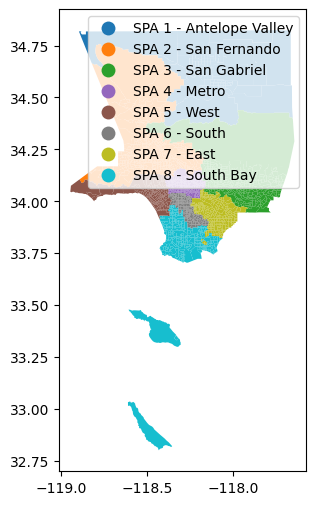

In [ ]:
merge_lim_eng.plot(column = 'spa',legend=True, figsize=(16,6))


<Axes: >

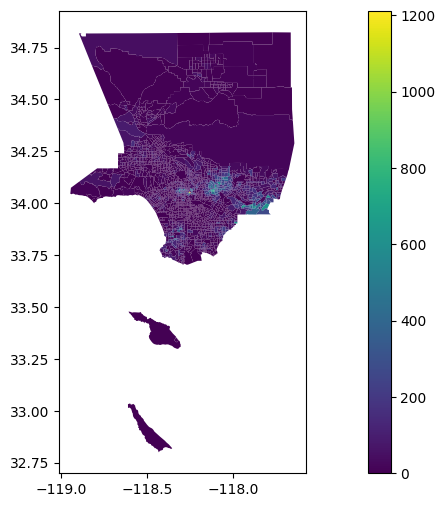

In [ ]:
merge_lim_eng.plot(column = 'S1602_C03_004E',legend=True, figsize=(16,6))


##1601

In [ ]:
lim_eng_1601 =pd.read_csv("/content/drive/MyDrive/Calteknet/Limited_English_Households_(census_tract)/ACSST5Y2022.S1601_2024-01-16T024156/ACSST5Y2022.S1601-Data.revise 2 2.csv")

In [ ]:
deleted_chars = 9

In [ ]:
lim_eng_1601['GEO_ID'] = lim_eng_1601['GEO_ID'].str[deleted_chars:]

In [ ]:
lim_eng_1601.head()

,GEO_ID,NAME,S1601_C01_001E,S1601_C01_001M,S1601_C01_002E,S1601_C01_002M,S1601_C01_003E,S1601_C01_003M,S1601_C01_004E,S1601_C01_004M,...,S1601_C06_020M,S1601_C06_021E,S1601_C06_021M,S1601_C06_022E,S1601_C06_022M,S1601_C06_023E,S1601_C06_023M,S1601_C06_024E,S1601_C06_024M,Unnamed: 290
0,06001400100,Census Tract 4001; Alameda County; California,3136,448,2449,438,687,206,142,84,...,1.8,(X),(X),11.5,8.9,10.9,14.5,11.7,11.1,NaN
1,06001400200,Census Tract 4002; Alameda County; California,1978,199,1670,254,308,131,69,86,...,1.6,(X),(X),11.8,11.0,21.4,33.3,9.0,9.5,NaN
2,06001400300,Census Tract 4003; Alameda County; California,5492,574,4623,491,869,353,207,259,...,1.8,(X),(X),16.9,12.6,0.0,31.5,20.3,14.6,NaN
3,06001400400,Census Tract 4004; Alameda County; California,3956,474,3463,470,493,146,232,119,...,0.9,(X),(X),11.3,8.1,25.3,21.4,6.5,6.8,NaN
4,06001400500,Census Tract 4005; Alameda County; California,3791,737,2991,738,800,251,261,97,...,2.0,(X),(X),11.3,11.8,0.0,17.5,17.9,19.2,NaN


In [ ]:
lim_eng_1601.shape

(9129, 291)



##Estimate!!Limited English-speaking households!!All households

S1602_C04_001E

In [ ]:
merge_lim_eng['S1602_C04_004E'] = merge_lim_eng['S1602_C04_004E'].astype(float)
#convert dtypes



In [ ]:
merge_lim_eng['S1602_C04_004E'].mean()

22.215430861723448

In [ ]:
from pingouin import ttest
ttest(merge_lim_eng.S1602_C01_004E, merge_lim_eng.S1602_C03_004E)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,25.413097,4988,two-sided,4.441414e-134,"[109.59, 127.92]",0.719511,1.252e+130,1.0


In [ ]:
merge_lim_eng['S1602_C01_004E'].mean()

In [ ]:
merge_lim_eng.groupby('spa')['S1602_C04_001E'].agg(['mean', 'std', 'size'])#limit english of precentage

In [ ]:
merge_lim_eng.groupby('spa')['S1602_C03_001E'].agg(['mean', 'std', 'size'])#limit english of precentage

In [ ]:
eng_lim_region = merge_lim_eng.groupby('spa')['S1602_C04_001E'].mean().reset_index()
eng_lim_region_join = pd.merge(limited_english, eng_lim_region, left_on='spa', right_on='spa', how='left')


TypeError: can only concatenate str (not "int") to str

In [ ]:
eng_lim_region_join.plot(column = 'S1602_C04_001E',legend=True, figsize=(16,6)).set_title('Percent limited English-speaking households!!All household')

In [ ]:
aov = pg.anova(dv='S1602_C04_001E', between='spa', data=merge_lim_eng,
               detailed=True)

#Estimate!!Percent limited English-speaking households!!All households

aov

In [ ]:
aov_1 = pg.anova(dv='S1602_C03_001E', between='spa', data=merge_lim_eng,
               detailed=True)
aov_1

the p-val is small than significant level, thus we can reject the null hypothesis.
the Limited English-speaking households is large different between greater SPA regions


The F ratio is higher than 1.0, so the variation among group means is more than you'd expect to see by chance, and the null hypothesis is false.

In [ ]:
merge_lim_eng.groupby('spa')['S1602_C03_001E'].agg(['mean', 'std', 'size'])##Estimate!!Limited English-speaking households!!All households

In [ ]:
aa = merge_lim_eng.groupby('spa')['S1602_C03_001E'].mean().reset_index()
##Estimate!!Limited English-speaking households!!All households
#reset mean indext

aa_join = pd.merge(limited_english, aa, left_on='spa', right_on='spa', how='left')


aa_join.plot(column = 'S1602_C03_001E',legend=True, figsize=(16,6)).set_title('limited English-speaking households!!All household')



In [ ]:
aov = pg.anova(dv='S1602_C03_001E', between='spa', data=merge_lim_eng,
               detailed=True)
aov

In [ ]:
ax = merge_lim_eng.plot(column = 'spa',legend = True, figsize=(10,10))
ax.set_title('Service Planning Areas (SPAs)')
legend = ax.get_legend()
legend.set_bbox_to_anchor((1.1, 0.23))



In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,8))


merge_lim_eng.plot(column = 'S1602_C01_002E', scheme='fisher_jenks', cmap='Reds', legend=True, ax=ax1)
ax1.set_title('Households speaking')

merge_lim_eng.plot(column = 'S1602_C03_004E', scheme='fisher_jenks', cmap='Reds', legend=True, ax=ax2)
ax2.set_title('Limited English-speaking households')

#Estimate!!Limited English-speaking households!!All households #, fontsize="20"

In [ ]:
merge_lim_eng.plot(column = 'S1602_C03_003E', scheme='fisher_jenks', cmap='Reds', legend=True,
                   figsize=(10,8)).set_title('Limited English-speaking households -- Other Indo-European languages', fontsize=10);

####gobal moran

Estimate!!Limited English-speaking households!!All households

In [ ]:
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local
from splot.esda import plot_local_autocorrelation
from splot.esda import plot_moran
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights

In [ ]:
y_lim = merge_lim_eng['S1602_C03_001E'].values
w_lim = weights.Queen.from_dataframe(merge_lim_eng)

In [ ]:
w_lim.transform = 'r'

In [ ]:
moran_lim = Moran(y_lim, w_lim)
print("Moran's I:", moran_lim.I)
print("Moran's p-val:", moran_lim.p_sim)

In [ ]:
plot_moran(moran_lim, zstandard=True, figsize=(10,4))

A Moran's I value of 0.48 suggests a moderate positive spatial autocorrelation in the variable you are analyzing. Moran's I is a measure of spatial autocorrelation that ranges from -1 (perfect dispersion) to 1 (perfect correlation). A value close to 0 indicates a lack of spatial autocorrelation, while positive or negative values suggest positive or negative spatial autocorrelation, respectively.



In [ ]:
moran_loc_lim = Moran_Local(y_lim, w_lim)

In [ ]:
lisa_cluster(moran_loc_lim, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()



##Estimate!Households speaking --!!Spanish

In [ ]:
merge_lim_eng['S1602_C02_002E'] = merge_lim_eng['S1602_C02_002E'].astype(float)
#Estimate!!Percent!!All households!!Households speaking --!!Spanish

In [ ]:
merge_lim_eng['S1602_C04_002E'] = merge_lim_eng['S1602_C04_002E'].astype(float)
#Estimate!!Percent limited English-speaking households!!All households!!Households speaking --!!Spanish

In [ ]:
merge_lim_eng.groupby('spa')['S1602_C03_002E'].agg(['mean', 'std', 'size'])#limit english of precentage

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,68.569892,67.325684,93
SPA 2 - San Fernando,70.279570,83.454676,558
SPA 3 - San Gabriel,54.946429,61.392992,392
SPA 4 - Metro,123.812500,125.009671,352
SPA 5 - West,18.610811,34.062281,185
SPA 6 - South,159.204082,107.806441,245
SPA 7 - East,128.737931,114.059325,290
SPA 8 - South Bay,70.489474,82.858798,380


In [ ]:
span_region = merge_lim_eng.groupby('spa')['S1602_C01_002E'].mean().reset_index()
span_region_join = pd.merge(limited_english , span_region, left_on='spa', right_on='spa', how='left')


Text(0.5, 1.0, 'Estimate!!Total!!All households!!Households speaking --!!Spanish')

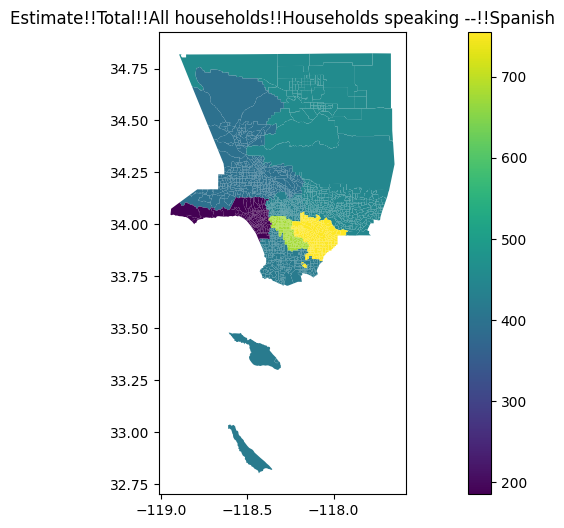

In [ ]:
span_region_join.plot(column = 'S1602_C01_002E',legend=True, figsize=(16,6)).set_title('Estimate!!Total!!All households!!Households speaking --!!Spanish')

In [ ]:
aov_span = pg.anova(dv='S1602_C01_002E', between='spa', data=merge_lim_eng,
               detailed=True)#Households speaking --!!Spanish
aov_span

,Source,SS,DF,MS,F,p-unc,np2
0,spa,5.388937e+07,7,7.698482e+06,98.126607,7.111244e-127,0.216418
1,Within,1.951165e+08,2487,7.845458e+04,NaN,NaN,NaN


In [ ]:
merge_lim_eng.groupby('spa')['S1602_C03_002E'].mean().reset_index()
#Estimate!!Limited English-speaking households!!All households

,spa,S1602_C03_002E
0,SPA 1 - Antelope Valley,68.569892
1,SPA 2 - San Fernando,70.279570
2,SPA 3 - San Gabriel,54.946429
3,SPA 4 - Metro,123.812500
4,SPA 5 - West,18.610811
5,SPA 6 - South,159.204082
6,SPA 7 - East,128.737931
7,SPA 8 - South Bay,70.489474


In [ ]:
aov = pg.anova(dv='S1602_C04_002E', between='spa', data=merge_lim_eng,
               detailed=True)

#Estimate!!Percent limited English-speaking households!!All households!!Households speaking --!!Spanish
aov

,Source,SS,DF,MS,F,p-unc,np2
0,spa,63816.822432,7,9116.688919,53.877741,5.899508e-72,0.131678
1,Within,420826.949087,2487,169.210675,NaN,NaN,NaN


###gobal moran

Estimate!!Percent!!All households!!Households speaking --!!Spanish

In [ ]:
y_lim_span = merge_lim_eng['S1602_C03_002E'].values
w_lim_span = Rook.from_dataframe(merge_lim_eng)
w_lim_span.transform = 'r'

<ipython-input-60-17ac9d5af28b>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_lim_span = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
moran_lim_span = Moran(y_lim_span, w_lim_span)
print("Moran's I:", moran_lim_span.I)
print("Moran's p-val:", moran_lim_span.p_sim)

Moran's I: 0.576756391592528
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.58', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.58)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

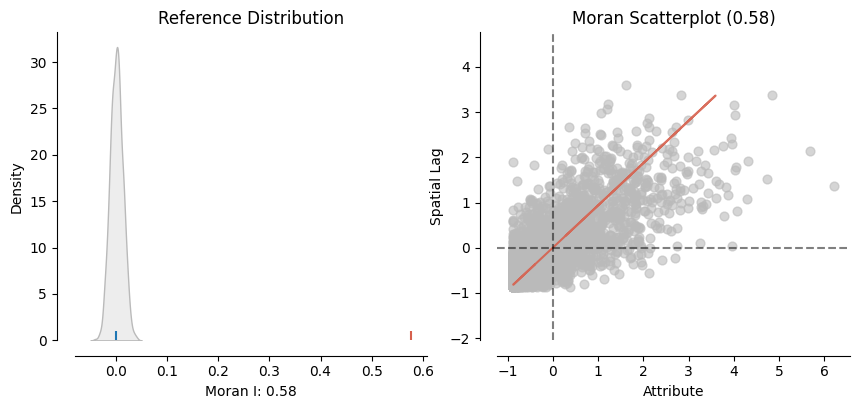

In [ ]:
plot_moran(moran_lim_span, zstandard=True, figsize=(10,4))

In [ ]:
moran_loc_lim_span = Moran_Local(y_lim_span, w_lim_span)

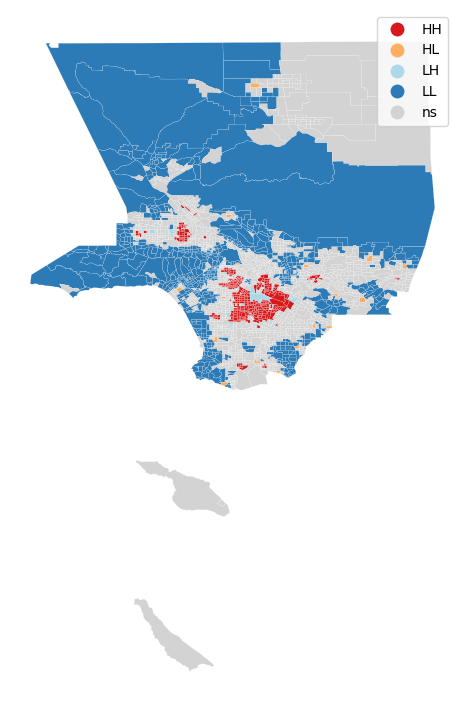

In [ ]:
lisa_cluster(moran_loc_lim_span, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

Estimate!!Percent limited English-speaking households!!All households!!Households speaking --!!Spanish

In [ ]:
y_span = merge_lim_eng['S1602_C01_002E'].values
w_span = Rook.from_dataframe(merge_lim_eng)
w_span.transform = 'r'

<ipython-input-65-effb15a3b046>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_span = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
moran_span = Moran(y_span, w_span)
print("Moran's I:", moran_span.I)
print("Moran's p-val:", moran_span.p_sim)

Moran's I: 0.61108550528064
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.61', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.61)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

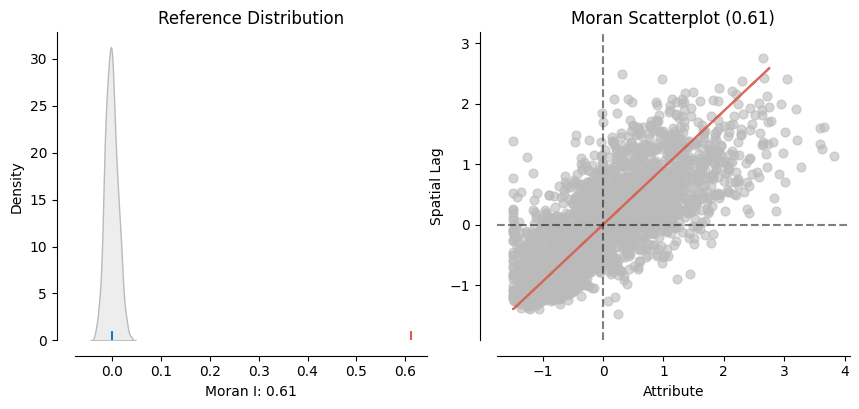

In [ ]:
plot_moran(moran_span, zstandard=True, figsize=(10,4))

In [ ]:
moran_loc_span = Moran_Local(y_span, w_span)

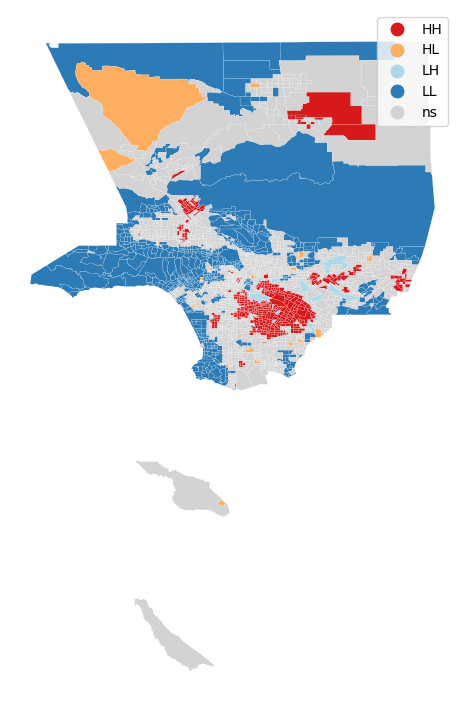

In [ ]:
lisa_cluster(moran_loc_span, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()



```
`# This is formatted as code`
```

##Estimate!!Households speaking --!!Other Indo-European languages

In [ ]:
merge_lim_eng['S1602_C02_003E'] = merge_lim_eng['S1602_C02_003E'].astype(float)
merge_lim_eng['S1602_C04_003E'] = merge_lim_eng['S1602_C04_003E'].astype(float)


In [ ]:
merge_lim_eng.groupby('spa')['S1602_C03_003E'].agg(['mean', 'std', 'size'])
#limit english of precentage


,mean,std,size
spa,,,
SPA 1 - Antelope Valley,5.946237,13.872373,93
SPA 2 - San Fernando,58.039427,103.957189,558
SPA 3 - San Gabriel,5.168367,17.688906,392
SPA 4 - Metro,23.119318,55.287876,352
SPA 5 - West,28.637838,48.497240,185
SPA 6 - South,1.526531,6.990942,245
SPA 7 - East,3.413793,11.015928,290
SPA 8 - South Bay,7.315789,15.170283,380


In [ ]:
eur_region = merge_lim_eng.groupby('spa')['S1602_C03_003E'].mean().reset_index()
eur_region.head()

,spa,S1602_C03_003E
0,SPA 1 - Antelope Valley,5.946237
1,SPA 2 - San Fernando,58.039427
2,SPA 3 - San Gabriel,5.168367
3,SPA 4 - Metro,23.119318
4,SPA 5 - West,28.637838


In [ ]:
eur_region_join = pd.merge(limited_english , eur_region, left_on='spa', right_on='spa', how='left')


Text(0.5, 1.0, 'limited English-speaking households!!!Other Indo-European languages')

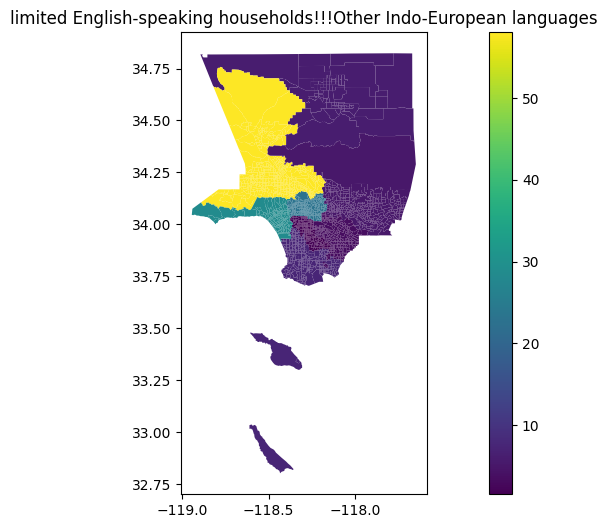

In [ ]:
eur_region_join.plot(column = 'S1602_C03_003E',legend=True, figsize=(16,6)).set_title('limited English-speaking households!!!Other Indo-European languages')

In [ ]:
aov_eur = pg.anova(dv='S1602_C01_003E', between='spa', data=merge_lim_eng,
               detailed=True)
#All households!!Households speaking --!!Other Indo-European languages
aov_eur

,Source,SS,DF,MS,F,p-unc,np2
0,spa,1.407097e+07,7,2.010139e+06,124.542918,2.933757e-157,0.259557
1,Within,4.014051e+07,2487,1.614013e+04,NaN,NaN,NaN


In [ ]:
aov_lim_eur = pg.anova(dv='S1602_C03_003E', between='spa', data=merge_lim_eng,
               detailed=True)
#Limited English-speaking households --!!Other Indo-European languages
aov_lim_eur

,Source,SS,DF,MS,F,p-unc,np2
0,spa,1.150977e+06,7,164425.282714,52.429716,4.569281e-70,0.128594
1,Within,7.799502e+06,2487,3136.108566,NaN,NaN,NaN


In [ ]:
merge_lim_eng.groupby('sup_dist')['S1602_C03_003E'].agg(['mean', 'std', 'size'])#limit english of precentage

,mean,std,size
sup_dist,,,
District 1,6.344064,26.913772,497
District 2,4.515810,12.949282,506
District 3,42.675045,65.353028,557
District 4,5.907598,14.330522,487
District 5,45.669643,107.259195,448


###gobal moran

Estimate!!Percent!!All households!!Households speaking --!!Other Indo-European languages

In [ ]:
y_eur = merge_lim_eng['S1602_C01_003E'].values
w_eur = Rook.from_dataframe(merge_lim_eng)
w_eur.transform = 'r'

<ipython-input-78-c80d824865a4>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_eur = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
moran_eur = Moran(y_eur, w_eur)
print("Moran's I:", moran_eur.I)
print("Moran's p-val:", moran_eur.p_sim)

Moran's I: 0.6803397126023755
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.68', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.68)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

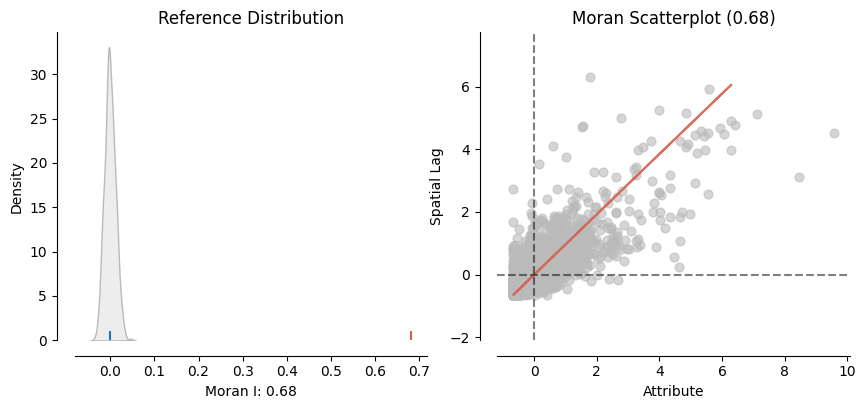

In [ ]:
plot_moran(moran_eur, zstandard=True, figsize=(10,4))

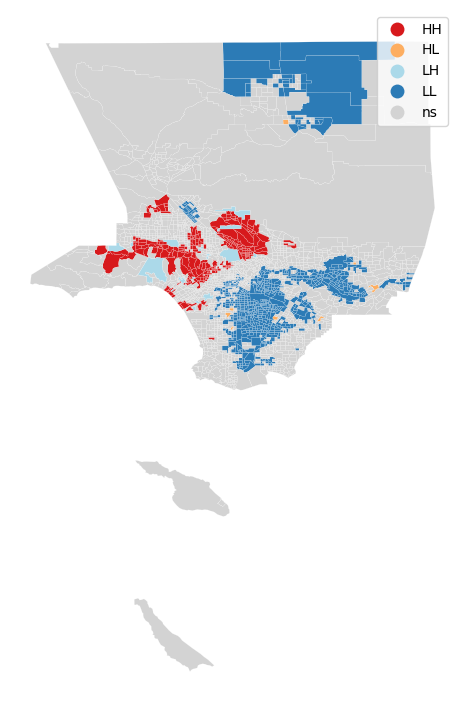

In [ ]:
moran_loc_eur = Moran_Local(y_eur, w_eur)
lisa_cluster(moran_loc_eur, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

Estimate!!Percent limited English-speaking households!!All households!!Households speaking --!!Other Indo-European languages

In [ ]:
y_eur_lim = merge_lim_eng['S1602_C03_003E'].values
w_eur_lim = Rook.from_dataframe(merge_lim_eng)
w_eur_lim.transform = 'r'

<ipython-input-82-4a355c4c2afa>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_eur_lim = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
moran_eur_lim = Moran(y_eur_lim, w_eur_lim)
print("Moran's I:", moran_eur_lim.I)
print("Moran's p-val:", moran_eur_lim.p_sim)

Moran's I: 0.5781701751521723
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.58', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.58)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

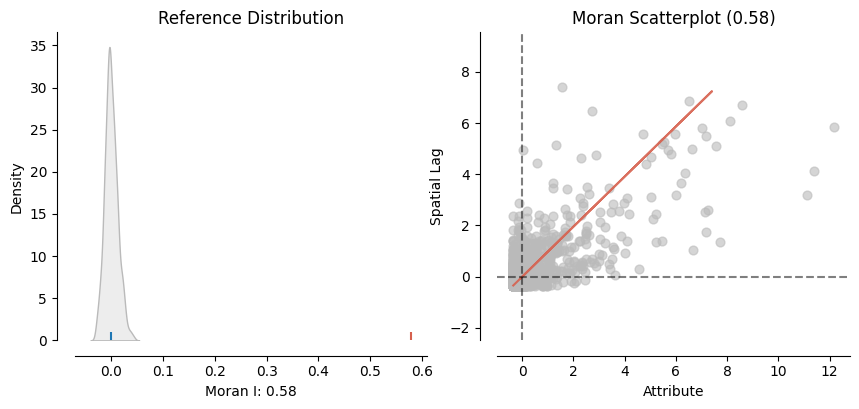

In [ ]:
plot_moran(moran_eur_lim, zstandard=True, figsize=(10,4))

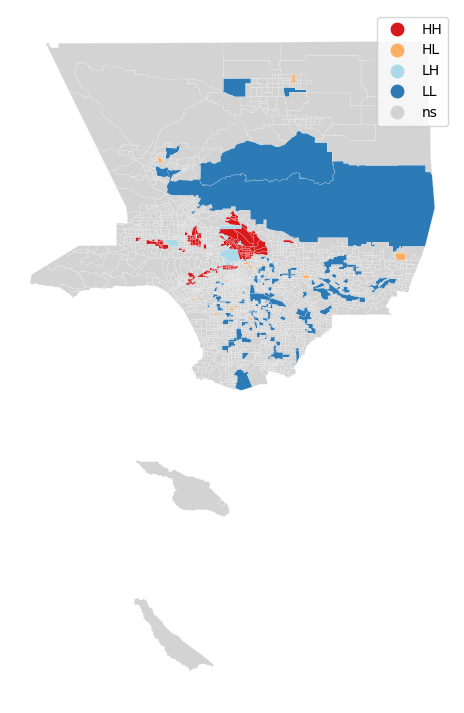

In [ ]:
moran_loc_eur_lim = Moran_Local(y_eur_lim, w_eur_lim)
lisa_cluster(moran_loc_eur_lim, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

##Estimate!!Percent!!All households!!Households speaking --!!Asian and Pacific Island languages

In [ ]:
merge_lim_eng['S1602_C02_004E'] = merge_lim_eng['S1602_C02_004E'].astype(float)
merge_lim_eng['S1602_C04_004E'] = merge_lim_eng['S1602_C04_004E'].astype(float)

In [ ]:
merge_lim_eng.groupby('spa')['S1602_C02_004E'].agg(['mean', 'std', 'size'])#limit english of precentage

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,3.343011,3.162119,93
SPA 2 - San Fernando,8.334229,7.163587,558
SPA 3 - San Gabriel,28.449490,20.847290,392
SPA 4 - Metro,14.965341,13.705163,352
SPA 5 - West,8.332432,6.675029,185
SPA 6 - South,2.686531,5.672188,245
SPA 7 - East,8.298276,11.655598,290
SPA 8 - South Bay,11.858684,11.062957,380


In [ ]:
asian_region = merge_lim_eng.groupby('spa')['S1602_C02_004E'].mean().reset_index()
asian_region_join = pd.merge(limited_english , asian_region, left_on='spa', right_on='spa', how='left')


Text(0.5, 1.0, 'Percent!!All households!!Households speaking --!!Asian and Pacific Island languages')

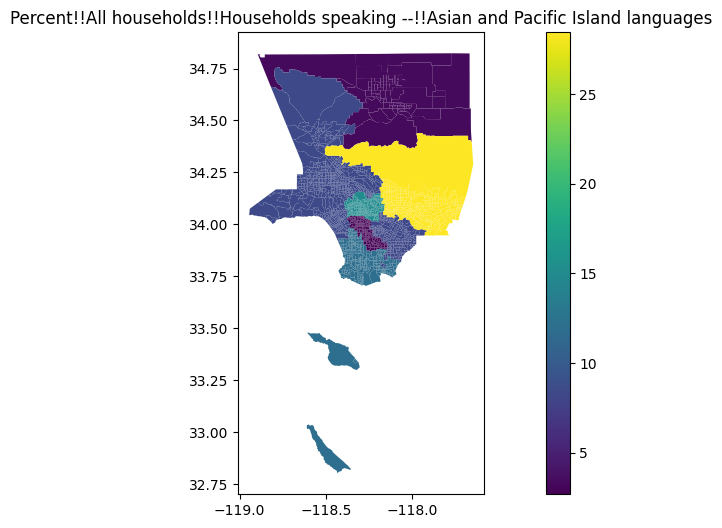

In [ ]:
asian_region_join.plot(column = 'S1602_C02_004E',legend=True, figsize=(16,6)).set_title('Percent!!All households!!Households speaking --!!Asian and Pacific Island languages')


In [ ]:
aov_asian = pg.anova(dv='S1602_C01_004E', between='spa', data=merge_lim_eng,
               detailed=True)
#All households!!Households speaking --!!Asian and Pacific Island languages

aov_asian

,Source,SS,DF,MS,F,p-unc,np2
0,spa,2.889935e+07,7,4.128479e+06,120.471442,1.103204e-152,0.25322
1,Within,8.522789e+07,2487,3.426935e+04,NaN,NaN,NaN


In [ ]:
aov_asian_lim = pg.anova(dv='S1602_C03_004E', between='sup_dist', data=merge_lim_eng,
               detailed=True)
#Limited English-speaking households!! --!!Asian and Pacific Island languages
aov_asian_lim

,Source,SS,DF,MS,F,p-unc,np2
0,sup_dist,2.931350e+06,4,732837.409074,96.945413,9.299450e-77,0.13475
1,Within,1.882260e+07,2490,7559.278868,NaN,NaN,NaN


In [ ]:
aov = pg.anova(dv='S1602_C04_004E', between='csa', data=merge_lim_eng,
               detailed=True)
#Estimate!!Percent limited English-speaking households!!
#All households!!Households speaking --!!Asian and Pacific Island languages

aov

,Source,SS,DF,MS,F,p-unc,np2
0,csa,3.731832e+05,298,1252.292566,2.45994,4.078675e-31,0.250272
1,Within,1.117927e+06,2196,509.074349,NaN,NaN,NaN


###gobal moran

Estimate!!Percent!!All households!!Households speaking --!!Asian and Pacific Island languages

In [ ]:
y_asian = merge_lim_eng['S1602_C01_004E'].values
w_asian = Rook.from_dataframe(merge_lim_eng)
w_asian.transform = 'r'

<ipython-input-93-23f57f999c03>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_asian = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
moran_asian = Moran(y_asian, w_asian)
print("Moran's I:", moran_asian.I)
print("Moran's p-val:", moran_asian.p_sim)

Moran's I: 0.6671855145128587
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.67', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.67)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

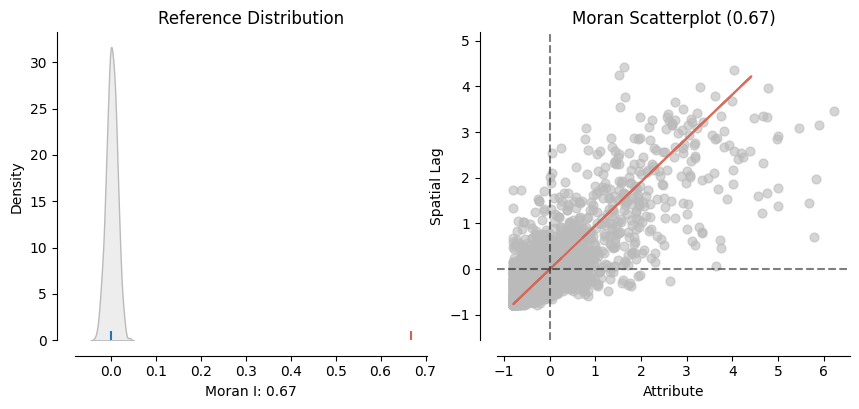

In [ ]:
plot_moran(moran_asian, zstandard=True, figsize=(10,4))

In [ ]:
moran_loc_asian = Moran_Local(y_asian, w_asian)

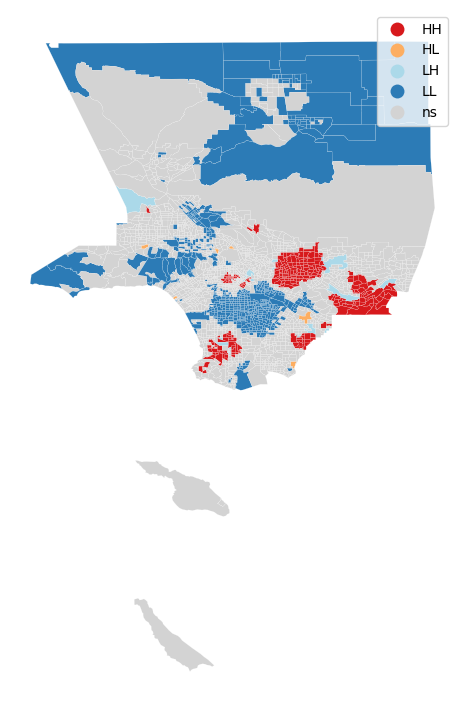

In [ ]:
lisa_cluster(moran_loc_asian, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

Estimate!!Limited English-speaking households!!All households!!Households speaking --!!Asian and Pacific Island languages

In [ ]:
y_asian_lim = merge_lim_eng['S1602_C03_004E'].values
w_asian_lim = Rook.from_dataframe(merge_lim_eng)
w_asian_lim.transform = 'r'

<ipython-input-98-a0c3b89c949f>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_asian_lim = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
moran_asian_lim = Moran(y_asian_lim, w_asian_lim)
print("Moran's I:", moran_asian_lim.I)
print("Moran's p-val:", moran_asian_lim.p_sim)

Moran's I: 0.57422002538905
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.57', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.57)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

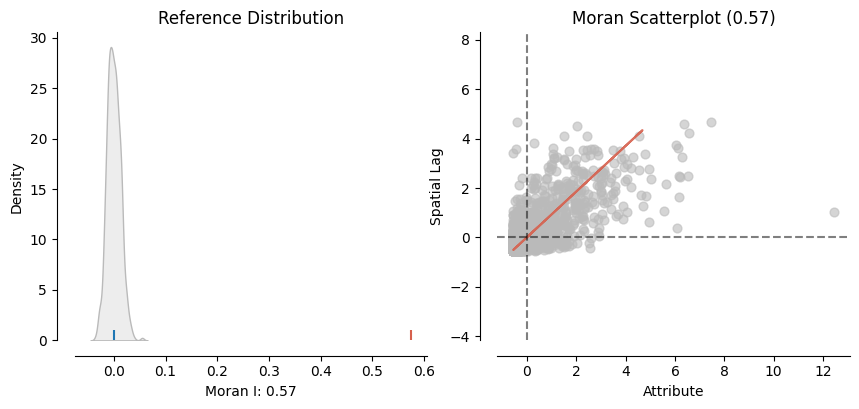

In [ ]:
plot_moran(moran_asian_lim, zstandard=True, figsize=(10,4))

In [ ]:
moran_lim_asian_map = Moran_Local(y_asian_lim, w_asian_lim)

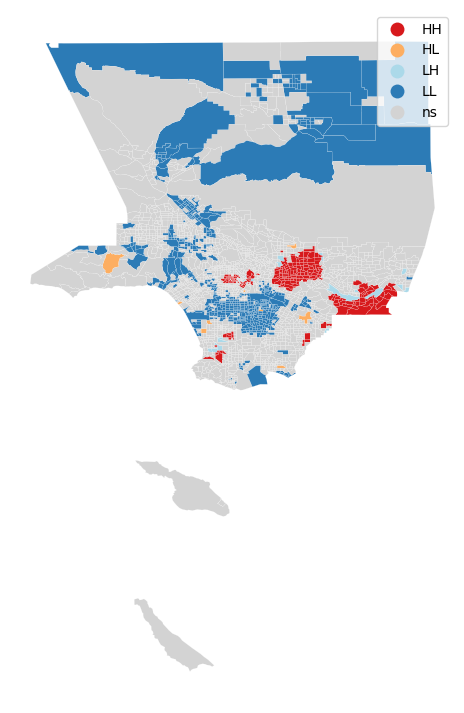

In [ ]:
lisa_cluster(moran_lim_asian_map, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

##-!!Other languages

In [ ]:
merge_lim_eng['S1602_C04_005E'] = merge_lim_eng['S1602_C04_005E'].astype(float)
merge_lim_eng['S1602_C02_005E'] = merge_lim_eng['S1602_C02_005E'].astype(float)

In [ ]:
merge_lim_eng.groupby('spa')['S1602_C03_005E'].agg(['mean', 'std', 'size'])#limit english of precentage

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,2.086022,8.717369,93
SPA 2 - San Fernando,5.204301,17.137563,558
SPA 3 - San Gabriel,1.770408,7.024134,392
SPA 4 - Metro,3.485795,12.478806,352
SPA 5 - West,2.918919,9.807324,185
SPA 6 - South,2.200000,8.054934,245
SPA 7 - East,1.182759,4.940236,290
SPA 8 - South Bay,2.613158,9.660208,380


In [ ]:
aov_other = pg.anova(dv='S1602_C01_005E', between='spa', data=merge_lim_eng,
               detailed=True)
#Estimate!!Total!!All households!!Households speaking --!!Other languages

aov_other

,Source,SS,DF,MS,F,p-unc,np2
0,spa,2.237817e+05,7,31968.817377,30.112426,3.340355e-40,0.078133
1,Within,2.640320e+06,2487,1061.648682,NaN,NaN,NaN


In [ ]:
aov_other_lim = pg.anova(dv='S1602_C03_005E', between='spa', data=merge_lim_eng,
               detailed=True)
#Estimate!!Limited English-speaking households!! --!!Other languages

aov_other_lim

,Source,SS,DF,MS,F,p-unc,np2
0,spa,4636.238510,7,662.319787,5.139761,0.000008,0.01426
1,Within,320479.719005,2487,128.861970,NaN,NaN,NaN


###gobal moran

In [ ]:
y_other = merge_lim_eng['S1602_C01_005E'].values
w_other = Rook.from_dataframe(merge_lim_eng)
w_other.transform = 'r'

<ipython-input-107-e43e5118f87d>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_other = Rook.from_dataframe(merge_lim_eng)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
moran_other = Moran(y_other, w_other)
print("Moran's I:", moran_other.I)
print("Moran's p-val:", moran_other.p_sim)

Moran's I: 0.2903330310116153
Moran's p-val: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.29', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.29)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

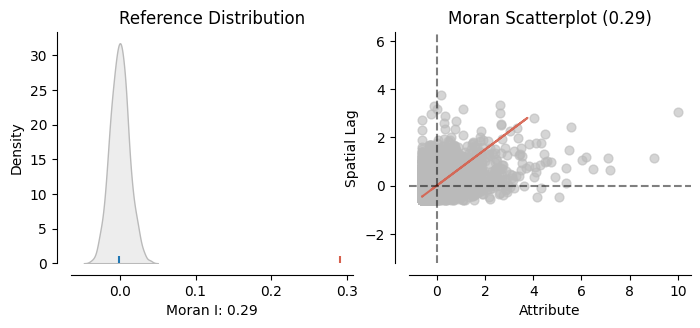

In [ ]:
plot_moran(moran_other, zstandard=True, figsize=(8,3))

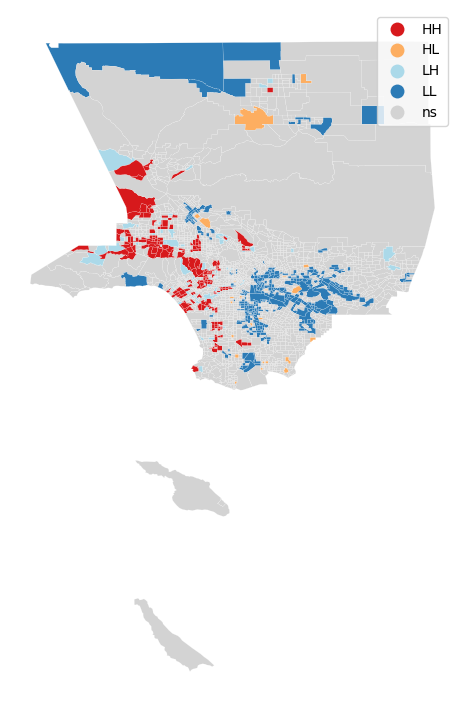

In [ ]:
moran_loc_other = Moran_Local(y_other, w_other)
lisa_cluster(moran_loc_other, merge_lim_eng, p=0.05, figsize = (9,9))
plt.show()

## output new file


In [ ]:

merge_lim_eng.to_file("output_shapefile.geojson", driver="GeoJSON")


#employment

https://geohub.lacity.org/datasets/lacounty::unemployment-census-tract/about

https://data.census.gov/map?q=Los%20Angeles%20County,%20California&g=050XX00US06037$1400000&tid=ACSST1Y2022.S2301&layer=VT_2022_140_00_PY_D1&mode=thematic&loc=33.9543,-117.9451,z8.1854
(S2301)

##data processing

In [ ]:
unemployment =gpd.read_file("/content/drive/MyDrive/Calteknet/Unemployment_(census_tract)/Unemployment__census_tract_.shp")

In [ ]:
unemployment.head()

,OBJECTID,tract,name,unemployme,sup_dist,csa,spa,SHAPE_Leng,SHAPE_Area,geometry
0,1,06037101110,1011.10,2.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112,"POLYGON ((-118.30077 34.25961, -118.30077 34.2..."
1,2,06037101122,1011.22,7.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265,"POLYGON ((-118.30321 34.27334, -118.29971 34.2..."
2,3,06037101220,1012.20,8.8,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068,"POLYGON ((-118.28594 34.25228, -118.28594 34.2..."
3,4,06037101221,1012.21,2.3,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035,"POLYGON ((-118.29946 34.25598, -118.29319 34.2..."
4,5,06037101222,1012.22,7.7,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.029524,0.000028,"POLYGON ((-118.29319 34.25233, -118.28863 34.2..."


In [ ]:
labor =pd.read_csv("/content/drive/MyDrive/Calteknet/Unemployment_(census_tract)/ACSST5Y2022.S2301_labor/ACSST5Y2022employment.csv")

In [ ]:
labor.shape

(2498, 283)

In [ ]:
deleted_chars = 9 #define number of charter delete

In [ ]:
labor['GEO_ID'] = labor['GEO_ID'].str[deleted_chars:]

merge data

In [ ]:
merge_labor = pd.merge(unemployment, labor, left_on='tract', right_on='GEO_ID', how='left') #s2301_polygon

In [ ]:
merge_labor = merge_labor.replace(['-', '**','NaN'], 0)


In [ ]:
merge_labor.head()

,OBJECTID,tract,name,unemployme,sup_dist,csa,spa,SHAPE_Leng,SHAPE_Area,geometry,...,S2301_C04_031M,S2301_C04_032E,S2301_C04_032M,S2301_C04_033E,S2301_C04_033M,S2301_C04_034E,S2301_C04_034M,S2301_C04_035E,S2301_C04_035M,Unnamed: 282
0,1,06037101110,1011.10,2.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112,"POLYGON ((-118.30077 34.25961, -118.30077 34.2...",...,3.2,25.8,28.5,0.0,10.4,8.0,5.7,3.4,4.2,NaN
1,2,06037101122,1011.22,7.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265,"POLYGON ((-118.30321 34.27334, -118.29971 34.2...",...,4.3,8.6,19.1,0.0,14.7,4.3,6.1,12.2,9.1,NaN
2,3,06037101220,1012.20,8.8,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068,"POLYGON ((-118.28594 34.25228, -118.28594 34.2...",...,5.0,0.0,11.2,13.3,13.2,24.0,13.0,3.3,3.8,NaN
3,4,06037101221,1012.21,2.3,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035,"POLYGON ((-118.29946 34.25598, -118.29319 34.2...",...,3.3,11.1,17.1,0.0,25.1,4.5,5.8,0.0,6.8,NaN
4,5,06037101222,1012.22,7.7,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.029524,0.000028,"POLYGON ((-118.29319 34.25233, -118.28863 34.2...",...,11.8,0.0,23.2,4.3,7.6,19.3,23.1,24.9,30.8,NaN


In [ ]:
merge_labor.dtypes

OBJECTID            int64
tract              object
name               object
unemployme        float64
sup_dist           object
                   ...   
S2301_C04_034E     object
S2301_C04_034M     object
S2301_C04_035E     object
S2301_C04_035M     object
Unnamed: 282      float64
Length: 293, dtype: object

###### output data

In [ ]:
merge_labor.to_file("merge_labor.geojson", driver="GeoJSON")


##Estimate!!Total!!Population 20 to 64 years!!DISABILITY STATUS!!With any disability

S2301_C01_030E

In [ ]:
merge_labor.groupby('spa')['S2301_C01_030E'].agg(['mean', 'std', 'size'])

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,269.043011,156.970706,93
SPA 2 - San Fernando,183.978495,107.783110,558
SPA 3 - San Gabriel,191.747449,108.935867,392
SPA 4 - Metro,172.934659,125.386190,352
SPA 5 - West,107.745946,88.497146,185
SPA 6 - South,257.428571,116.959044,245
SPA 7 - East,195.293103,112.276939,290
SPA 8 - South Bay,205.373684,150.792934,380


<Axes: >

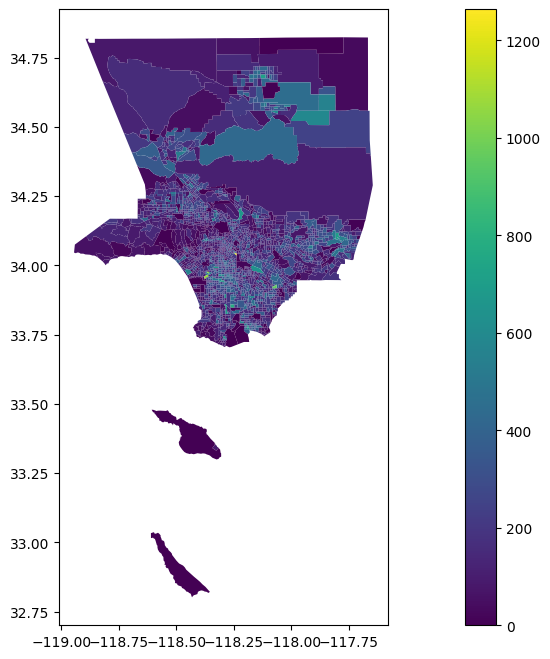

In [ ]:
merge_labor.plot(column = 'S2301_C01_030E',legend=True, figsize=(20,8))


##Estimate!!Total!!EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Some college or associate's degree

S2301_C01_034E

In [ ]:
merge_labor['S2301_C02_028E'] = merge_labor['S2301_C02_028E'].astype(float)
#Estimate!!Labor Force Participation Rate!!Population 20 to 64 years!!POVERTY STATUS IN THE PAST 12 MONTHS!!Below poverty level

In [ ]:
merge_labor.groupby('spa')['S2301_C02_028E'].agg(['mean', 'std', 'size'])#S2301_C01_034E

,mean,std,size
spa,,,
SPA 1 - Antelope Valley,36.343011,19.322140,93
SPA 2 - San Fernando,49.519355,21.518932,558
SPA 3 - San Gabriel,45.793622,19.512640,392
SPA 4 - Metro,51.355114,16.814509,352
SPA 5 - West,45.180000,24.028626,185
SPA 6 - South,46.238367,13.727303,245
SPA 7 - East,46.991034,18.836427,290
SPA 8 - South Bay,45.786579,21.525224,380


<Axes: >

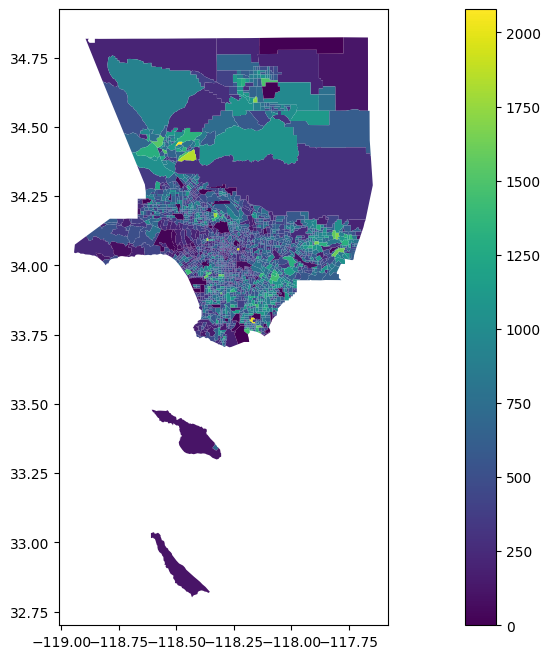

In [ ]:
merge_labor.plot(column = 'S2301_C01_034E',legend=True, figsize=(20,8))


In [ ]:
y

NameError: name 'y' is not defined

#join data

In [ ]:
labor.shape

(2498, 283)

In [ ]:
merge_labor_lim_eng = pd.merge(merge_labor, lim_eng_1601, left_on='GEO_ID', right_on='GEO_ID', how='left')

In [ ]:
merge_labor_lim_eng.shape

(2495, 583)

In [ ]:
merge_labor_lim_eng = merge_labor_lim_eng.replace(['-', '**','(X)'], 0)


In [ ]:
merge_labor_lim_eng.head()

,OBJECTID,tract,name,unemployme,sup_dist,csa,spa,SHAPE_Leng,SHAPE_Area,geometry,...,S1601_C06_020M,S1601_C06_021E,S1601_C06_021M,S1601_C06_022E,S1601_C06_022M,S1601_C06_023E,S1601_C06_023M,S1601_C06_024E,S1601_C06_024M,Unnamed: 290
0,1,06037101110,1011.10,2.9,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.046261,0.000112,"POLYGON ((-118.30077 34.25961, -118.30077 34.2...",...,7.6,0,0,39.5,10.6,31.7,16.4,43.2,14.1,NaN
1,2,06037101122,1011.22,7.0,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.090761,0.000265,"POLYGON ((-118.30321 34.27334, -118.29971 34.2...",...,12.2,0,0,37.1,16.1,5.9,9.3,40.9,16.4,NaN
2,3,06037101220,1012.20,8.8,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.037876,0.000068,"POLYGON ((-118.28594 34.25228, -118.28594 34.2...",...,6.0,0,0,36.7,8.9,7.9,6.5,57.4,13.7,NaN
3,4,06037101221,1012.21,2.3,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.028432,0.000035,"POLYGON ((-118.29946 34.25598, -118.29319 34.2...",...,12.8,0,0,53.8,14.3,38.5,28.6,59.6,15.3,NaN
4,5,06037101222,1012.22,7.7,District 5,Los Angeles - Tujunga,SPA 2 - San Fernando,0.029524,0.000028,"POLYGON ((-118.29319 34.25233, -118.28863 34.2...",...,9.2,0,0,50.8,12.7,12.3,14.2,64.3,13.7,NaN


#spatial merge

In [ ]:
from libpysal.examples import available
from pysal.model import spreg
from pysal.lib import weights
from pysal.explore import esda

from scipy import stats
import statsmodels.formula.api as sm


/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [ ]:
edu = ['S2301_C01_035E','S2301_C01_034E','S2301_C01_033E','S2301_C01_032E']

#S2301_C01_032E:
#EDUCATIONAL ATTAINMENT!!Population 25 to 64 years!!Less than high school graduate
#S2301_C01_033E
#Population 25 to 64 years!!High school graduate (includes equivalency)
#S2301_C01_034E
#Population 25 to 64 years!!Some college or associate's degree
#S2301_C01_035E
#Population 25 to 64 years!!Bachelor's degree or higher

In [ ]:
merge_labor_lim_eng['S2301_C02_021E'] = merge_labor_lim_eng['S2301_C02_021E'].astype(float)


In [ ]:
merge_labor_lim_eng.shape


(2495, 583)

# spatial regression model analysis

In [ ]:
m1 = spreg.OLS(merge_labor_lim_eng[['S1601_C05_022E']].values, merge_labor_lim_eng[edu].values,
                  name_y = 'S1601_C05_022E', name_x = edu)

#S1601_C05_003E
#Estimate!!Speak English  less than very well"!!Percent of specified language speakers!!Population 5 years and over!!Speak a language other than English"
#S2301_C01_028E
#Estimate!!Total!!Population 20 to 64 years!!POVERTY STATUS IN THE PAST 12 MONTHS!!Below poverty level
#Estimate!!Speak English  less than very well"!!Percent of specified language speakers!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over"

In [ ]:
print(m1.summary) #limited english with education

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :S1601_C05_022E                Number of Observations:        2495
Mean dependent var  :    414.7006                Number of Variables   :           5
S.D. dependent var  :    287.6663                Degrees of Freedom    :        2490
R-squared           :      0.3601
Adjusted R-squared  :      0.3590
Sum squared residual: 1.32075e+08                F-statistic           :    350.2332
Sigma-square        :   53042.096                Prob(F-statistic)     :  2.013e-239
S.E. of regression  :     230.309                Log likelihood        :  -17109.103
Sigma-square ML     :   52935.799                Akaike info criterion :   34228.207
S.E of regression ML:    230.0778                Schwarz criterion     :   34257.317

----------------------------------------------------------

r square is 0.6512, which means limited english explains 65.12% education variation.

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": m1.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": m1.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in m1.t_stat],
},
index=m1.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,62.220,13.319,0.000
S2301_C01_035E,0.076,0.010,0.000
S2301_C01_034E,-0.005,0.022,0.809
S2301_C01_033E,0.455,0.026,0.000
S2301_C01_032E,0.226,0.018,0.000


In [ ]:
m2 = spreg.OLS(merge_labor_lim_eng[['S2301_C01_029E']].values, merge_labor_lim_eng[edu].values,
                  name_y = "S2301_C01_029E", name_x = edu) #poverty with edu


In [ ]:
print(m2.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :S2301_C01_029E                Number of Observations:        2495
Mean dependent var  :   2154.3303                Number of Variables   :           5
S.D. dependent var  :    838.0351                Degrees of Freedom    :        2490
R-squared           :      0.9186
Adjusted R-squared  :      0.9184
Sum squared residual: 1.42644e+08                F-statistic           :   7021.2615
Sigma-square        :   57286.685                Prob(F-statistic)     :           0
S.E. of regression  :     239.346                Log likelihood        :  -17205.139
Sigma-square ML     :   57171.882                Akaike info criterion :   34420.278
S.E of regression ML:    239.1064                Schwarz criterion     :   34449.388

----------------------------------------------------------

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": m2.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": m2.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in m2.t_stat],
},
index=m2.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,26.380,13.842,0.057
S2301_C01_035E,0.973,0.010,0.000
S2301_C01_034E,1.018,0.023,0.000
S2301_C01_033E,1.079,0.027,0.000
S2301_C01_032E,0.752,0.019,0.000


##lang

In [ ]:
predictors_2 = ['S1601_C05_021E','S1601_C05_022E','S1601_C03_021E','S1601_C03_022E'] #english
#'S1601_C03_002E'
#speak English very well"!!Percent of specified language speakers!!Population 5 years and over!!Speak only English"
#'S1601_C03_003E'
#speak English very well"!!Percent of specified language speakers!!Population 5 years and over!!Speak a language other than English"
#S1601_C03_018E
#speak English very well"!!Percent of specified language speakers!!Population 5 years and over!!SPEAK A LANGUAGE OTHER THAN ENGLISH!!Other languages!!18 to 64 years old"

In [ ]:
merge_labor_lim_eng.S1601_C05_020E
#,,'S1601_C03_020E','S1601_C03_021E','S1601_C03_022E'


0       689
1       683
2       562
3       789
4       608
       ... 
2490     45
2491     85
2492      0
2493      0
2494      0
Name: S1601_C05_020E, Length: 2495, dtype: int64

In [ ]:
less_well =['S1601_C05_006E','S1601_C05_010E','S1601_C05_014E','S1601_C05_018E']

In [ ]:
well_eng =['S1601_C03_006E','S1601_C03_010E','S1601_C03_014E','S1601_C03_018E']

In [ ]:
merge_labor_lim_eng['S1601_C05_020E'] = merge_labor_lim_eng['S1601_C05_020E'].astype(int)
merge_labor_lim_eng['S1601_C05_021E'] = merge_labor_lim_eng['S1601_C05_021E'].astype(int)
merge_labor_lim_eng['S1601_C05_022E'] = merge_labor_lim_eng['S1601_C05_022E'].astype(int)

merge_labor_lim_eng['S1601_C03_020E'] = merge_labor_lim_eng['S1601_C03_020E'].astype(int)
merge_labor_lim_eng['S1601_C03_021E'] = merge_labor_lim_eng['S1601_C03_021E'].astype(int)
merge_labor_lim_eng['S1601_C03_022E'] = merge_labor_lim_eng['S1601_C03_022E'].astype(int)



In [ ]:
#S1601_C03_020E',
#Estimate!!Speak English only or speak English very well"!!Percent of specified language speakers!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over"
#'S1601_C03_021E',
#Estimate!!Speak English only or speak English very well"!!Percent of specified language speakers!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak only English"
#'S1601_C03_022E'
#Estimate!!Speak English only or speak English very well"!!Percent of specified language speakers!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English"

In [ ]:
#'S1601_C05_001E',
#Estimate!!Speak English  less than very well"!!Percent of specified language speakers!!Population 5 years and over"
#'S1601_C05_022E'
#Estimate!!Speak English  less than very well"!!Percent of specified language speakers!!CITIZENS 18 YEARS AND OVER!!All citizens 18 years old and over!!Speak a language other than English"

#S1601_C06_001E
#speak English less than very well"!!Percent of specified language speakers!!Population 5 years and over"

In [ ]:
m3 = spreg.OLS(merge_labor_lim_eng[['S2301_C01_029E']].values, merge_labor_lim_eng[predictors_2].values,
                  name_y = 'S2301_C01_029E', name_x = predictors_2)

#Estimate!!Total!!Population 20 to 64 years!!POVERTY STATUS IN THE PAST 12 MONTHS!!At or above the poverty level

In [ ]:
print(m3.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :S2301_C01_029E                Number of Observations:        2495
Mean dependent var  :   2154.3303                Number of Variables   :           3
S.D. dependent var  :    838.0351                Degrees of Freedom    :        2492
R-squared           :      0.4295
Adjusted R-squared  :      0.4290
Sum squared residual: 9.99257e+08                F-statistic           :    938.0457
Sigma-square        :  400985.894                Prob(F-statistic)     :  1.974e-304
S.E. of regression  :     633.234                Log likelihood        :  -19633.598
Sigma-square ML     :  400503.747                Akaike info criterion :   39273.197
S.E of regression ML:    632.8537                Schwarz criterion     :   39290.663

----------------------------------------------------------

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": m3.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": m3.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in m3.t_stat],
},
index=m3.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,1103.658,27.554,0.000
S1601_C05_022E,0.159,0.055,0.004
S1601_C03_022E,1.199,0.037,0.000


In [ ]:
less = spreg.OLS(merge_labor_lim_eng[['S2301_C01_029E']].values, merge_labor_lim_eng[less_well].values,
                  name_y = 'S2301_C01_029E', name_x = less_well) #below_poverty

In [ ]:
print(less.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :S2301_C01_029E                Number of Observations:        2495
Mean dependent var  :   2154.3303                Number of Variables   :           5
S.D. dependent var  :    838.0351                Degrees of Freedom    :        2490
R-squared           :      0.1484
Adjusted R-squared  :      0.1470
Sum squared residual: 1.49164e+09                F-statistic           :    108.4659
Sigma-square        :  599050.864                Prob(F-statistic)     :   2.633e-85
S.E. of regression  :     773.984                Log likelihood        :  -20133.369
Sigma-square ML     :  597850.361                Akaike info criterion :   40276.737
S.E of regression ML:    773.2078                Schwarz criterion     :   40305.847

----------------------------------------------------------

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": less.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": less.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in less.t_stat],
},
index=less.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,144.531,6.132,0.0
S1601_C05_006E,0.277,0.008,0.0
S1601_C05_010E,0.289,0.036,0.0
S1601_C05_014E,0.109,0.017,0.0
S1601_C05_018E,0.942,0.161,0.0


In [ ]:
well = spreg.OLS(merge_labor_lim_eng[['S2301_C01_028E']].values, merge_labor_lim_eng[well_eng].values,
                  name_y = 'S2301_C01_028E', name_x = well_eng)

NameError: name 'well_eng' is not defined

In [ ]:
print(well.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :S2301_C01_028E                Number of Observations:        2495
Mean dependent var  :    294.9126                Number of Variables   :           5
S.D. dependent var  :    213.1207                Degrees of Freedom    :        2490
R-squared           :      0.1513
Adjusted R-squared  :      0.1500
Sum squared residual: 9.61376e+07                F-statistic           :    110.9891
Sigma-square        :   38609.495                Prob(F-statistic)     :   3.679e-87
S.E. of regression  :     196.493                Log likelihood        :  -16712.913
Sigma-square ML     :   38532.121                Akaike info criterion :   33435.826
S.E of regression ML:    196.2960                Schwarz criterion     :   33464.936

----------------------------------------------------------

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": well.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": well.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in well.t_stat],
},
index=well.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,166.908,8.753,0.000
S1601_C03_006E,0.187,0.009,0.000
S1601_C03_010E,0.066,0.029,0.022
S1601_C03_014E,0.015,0.022,0.505
S1601_C03_018E,0.249,0.093,0.007


### unemploy

In [ ]:
merge_labor_lim_eng.S2301_C04_021E

0        8.6
1       10.4
2       12.1
3        4.6
4       12.2
        ... 
2490     7.4
2491     6.3
2492       0
2493       0
2494       0
Name: S2301_C04_021E, Length: 2495, dtype: object

In [ ]:
#S2301_C03_021E
#Estimate!!Employment/Population Ratio!!Population 20 to 64 years
#S2301_C04_021E
#Estimate!!Unemployment rate!!Population 20 to 64 years

In [ ]:
merge_labor_lim_eng['S2301_C04_021E'] = merge_labor_lim_eng['S2301_C04_021E'].astype(float)
merge_labor_lim_eng['S2301_C03_021E'] = merge_labor_lim_eng['S2301_C03_021E'].astype(float)


In [ ]:
unemploy = spreg.OLS(merge_labor_lim_eng[['S2301_C03_021E']].values, merge_labor_lim_eng[less_well].values,
                  name_y = 'S2301_C03_021E', name_x = less_well)

In [ ]:
print(unemploy.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :S2301_C03_021E                Number of Observations:        2495
Mean dependent var  :     72.1040                Number of Variables   :           5
S.D. dependent var  :     10.6676                Degrees of Freedom    :        2490
R-squared           :      0.0150
Adjusted R-squared  :      0.0134
Sum squared residual:      279548                F-statistic           :      9.4905
Sigma-square        :     112.268                Prob(F-statistic)     :   1.298e-07
S.E. of regression  :      10.596                Log likelihood        :   -9427.062
Sigma-square ML     :     112.043                Akaike info criterion :   18864.124
S.E of regression ML:     10.5851                Schwarz criterion     :   18893.234

----------------------------------------------------------

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": unemploy.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": unemploy.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in unemploy.t_stat],
},
index=unemploy.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,72.401,0.366,0.000
S1601_C05_006E,-0.002,0.001,0.000
S1601_C05_010E,0.004,0.002,0.068
S1601_C05_014E,0.003,0.001,0.006
S1601_C05_018E,0.012,0.010,0.210


In [ ]:
unemploy_well = spreg.OLS(merge_labor_lim_eng[['S2301_C03_021E']].values, merge_labor_lim_eng[well_eng].values,
                  name_y = 'S2301_C03_021E', name_x = well_eng)

In [ ]:
print(unemploy_well.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :S2301_C03_021E                Number of Observations:        2495
Mean dependent var  :     72.1040                Number of Variables   :           5
S.D. dependent var  :     10.6676                Degrees of Freedom    :        2490
R-squared           :      0.0274
Adjusted R-squared  :      0.0259
Sum squared residual:      276029                F-statistic           :     17.5472
Sigma-square        :     110.855                Prob(F-statistic)     :   3.275e-14
S.E. of regression  :      10.529                Log likelihood        :   -9411.259
Sigma-square ML     :     110.633                Akaike info criterion :   18832.518
S.E of regression ML:     10.5182                Schwarz criterion     :   18861.628

----------------------------------------------------------

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": unemploy_well.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": unemploy_well.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in unemploy_well.t_stat],
},
index=unemploy_well.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,70.130,0.469,0.000
S1601_C03_006E,0.000,0.000,0.650
S1601_C03_010E,0.007,0.002,0.000
S1601_C03_014E,0.006,0.001,0.000
S1601_C03_018E,0.011,0.005,0.021


###swls unemploy

In [ ]:
w_ = weights.KNN.from_dataframe(merge_labor_lim_eng, k=8)
w_.transform = 'R'
w_

In [ ]:
less_swls = spreg.GM_Error_Het(
    # Dependent variable
    merge_labor_lim_eng[["S2301_C04_021E"]].values,
    # Independent variables
    merge_labor_lim_eng[less_well].values,
    # Spatial weights matrix
    w=w_,
    # Dependent variable name
    name_y="S2301_C04_021E",
    # Independent variables names
    name_x=less_well,
)

In [ ]:
print(less_swls.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :S2301_C04_021E                Number of Observations:        2495
Mean dependent var  :      6.6778                Number of Variables   :           5
S.D. dependent var  :      4.0548                Degrees of Freedom    :        2490
Pseudo R-squared    :      0.0219
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         6.20762         0.20731        29.94392         0.00000
      S1601_C05_006E         0.00085         0.00024  

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": less_swls.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": less_swls.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in less_swls.z_stat],
},
index=less_swls.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,6.208,0.207,0.000
S1601_C05_006E,0.001,0.000,0.000
S1601_C05_010E,0.003,0.001,0.001
S1601_C05_014E,-0.001,0.000,0.132
S1601_C05_018E,0.003,0.003,0.306
lambda,0.399,0.038,0.000


In [ ]:
well_swls = spreg.GM_Error_Het(
    # Dependent variable
    merge_labor_lim_eng[["S2301_C04_021E"]].values,
    # Independent variables
    merge_labor_lim_eng[well_eng].values,
    # Spatial weights matrix
    w=w_,
    # Dependent variable name
    name_y="S2301_C04_021E",
    #Estimate!!Total!!Population 20 to 64 years!!POVERTY STATUS IN THE PAST 12 MONTHS!!At or above the poverty level
    # Independent variables names
    name_x=well_eng,
)

In [ ]:
print(well_swls.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :S2301_C04_021E                Number of Observations:        2495
Mean dependent var  :      6.6778                Number of Variables   :           5
S.D. dependent var  :      4.0548                Degrees of Freedom    :        2490
Pseudo R-squared    :      0.0118
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT         6.37798         0.28053        22.73557         0.00000
      S1601_C03_006E         0.00047         0.00023  

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": well_swls.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": well_swls.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in well_swls.z_stat],
},
index=well_swls.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,6.378,0.281,0.000
S1601_C03_006E,0.000,0.000,0.037
S1601_C03_010E,0.001,0.001,0.072
S1601_C03_014E,-0.001,0.001,0.014
S1601_C03_018E,0.002,0.002,0.225
lambda,0.418,0.037,0.000


###edu_poverty

In [ ]:
w_ = weights.KNN.from_dataframe(merge_labor_lim_eng, k=8)
w_.transform = 'R'
w_

In [ ]:
m4 = spreg.GM_Error_Het(
    # Dependent variable
    merge_labor_lim_eng[["S2301_C01_029E"]].values,
    # Independent variables
    merge_labor_lim_eng[edu].values,
    # Spatial weights matrix
    w=w_,
    # Dependent variable name
    name_y="S2301_C01_029E",
    #Estimate!!Total!!Population 20 to 64 years!!POVERTY STATUS IN THE PAST 12 MONTHS!!At or above the poverty level
    # Independent variables names
    name_x=edu,
)

In [ ]:
print(m4.summary) #

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :S2301_C01_029E                Number of Observations:        2495
Mean dependent var  :   2154.3303                Number of Variables   :           5
S.D. dependent var  :    838.0351                Degrees of Freedom    :        2490
Pseudo R-squared    :      0.9174
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        41.72663        46.86663         0.89033         0.37329
      S2301_C01_035E         1.00392         0.01098  

A pseudo R-squared is close to 1, which means better to predicts the outcome.

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": m4.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": m4.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in m4.z_stat],
},
index=m4.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,41.727,46.867,0.373
S2301_C01_035E,1.004,0.011,0.000
S2301_C01_034E,0.990,0.032,0.000
S2301_C01_033E,1.022,0.041,0.000
S2301_C01_032E,0.756,0.069,0.000
lambda,0.478,0.034,0.000


###edu_limited_eng


In [ ]:
m5 = spreg.GM_Error_Het(
    # Dependent variable
    merge_labor_lim_eng[["S1601_C05_022E"]].values,
    # Independent variables
    merge_labor_lim_eng[edu].values,
    # Spatial weights matrix
    w=w_,
    # Dependent variable name
    name_y="S1601_C05_022E",
    # Independent variables names
    name_x=edu,
)

In [ ]:
print(m5.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :S1601_C05_022E                Number of Observations:        2495
Mean dependent var  :    414.7006                Number of Variables   :           5
S.D. dependent var  :    287.6663                Degrees of Freedom    :        2490
Pseudo R-squared    :      0.3474
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT        65.82114        16.47819         3.99444         0.00006
      S2301_C01_035E         0.07910         0.01267  

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": m5.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": m5.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in m5.z_stat],
},
index=m5.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,65.821,16.478,0.0
S2301_C01_035E,0.079,0.013,0.0
S2301_C01_034E,0.095,0.021,0.0
S2301_C01_033E,0.274,0.027,0.0
S2301_C01_032E,0.261,0.026,0.0
lambda,0.771,0.016,0.0


In [ ]:
m6 = spreg.GM_Error_Het(
    # Dependent variable
    merge_labor_lim_eng[["S2301_C01_029E"]].values,
    # Independent variables
    merge_labor_lim_eng[predictors_2].values,
    # Spatial weights matrix
    w=w_,
    # Dependent variable name
    name_y="S2301_C01_029E",
    # Independent variables names
    name_x=predictors_2,
)

In [ ]:
print(m6.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :S2301_C01_029E                Number of Observations:        2495
Mean dependent var  :   2154.3303                Number of Variables   :           3
S.D. dependent var  :    838.0351                Degrees of Freedom    :        2492
Pseudo R-squared    :      0.4212
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       819.21837        53.91886        15.19354         0.00000
      S1601_C05_022E         0.62112         0.13151  

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": m6.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": m6.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in m5.z_stat],
},
index=m6.name_x
# Round to four decimals
).round(3)

ValueError: Length of values (6) does not match length of index (4)

###swls english level

In [ ]:
less_swls = spreg.GM_Error_Het(
    # Dependent variable
    merge_labor_lim_eng[["S2301_C01_028E"]].values,
    # Independent variables
    merge_labor_lim_eng[less_well].values,
    # Spatial weights matrix
    w=w_,
    # Dependent variable name
    name_y="S2301_C01_028E",
    # Independent variables names
    name_x=less_well,
)

In [ ]:
print(less_swls.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :S2301_C01_028E                Number of Observations:        2495
Mean dependent var  :    294.9126                Number of Variables   :           5
S.D. dependent var  :    213.1207                Degrees of Freedom    :        2490
Pseudo R-squared    :      0.3035
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       122.97275         8.38457        14.66656         0.00000
      S1601_C05_006E         0.28960         0.01153  

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": less_swls.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": less_swls.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in less_swls.z_stat],
},
index=less_swls.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,122.973,8.385,0.0
S1601_C05_006E,0.290,0.012,0.0
S1601_C05_010E,0.370,0.054,0.0
S1601_C05_014E,0.183,0.021,0.0
S1601_C05_018E,0.832,0.170,0.0
lambda,0.538,0.040,0.0


In [ ]:
well_swls = spreg.GM_Error_Het(
    # Dependent variable
    merge_labor_lim_eng[["S2301_C01_028E"]].values,
    # Independent variables
    merge_labor_lim_eng[well_eng].values,
    # Spatial weights matrix
    w=w_,
    # Dependent variable name
    name_y="S2301_C01_028E",
    # Independent variables names
    name_x=well_eng,
)

In [ ]:
print(well_swls.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: GM SPATIALLY WEIGHTED LEAST SQUARES (HET)
------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :S2301_C01_028E                Number of Observations:        2495
Mean dependent var  :    294.9126                Number of Variables   :           5
S.D. dependent var  :    213.1207                Degrees of Freedom    :        2490
Pseudo R-squared    :      0.1505
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       123.46512        16.37667         7.53909         0.00000
      S1601_C03_006E         0.22568         0.01387  

In [ ]:
pd.DataFrame(
{
# Pull out regression coefficients and
# flatten as they are returned as Nx1 array
"Coeff.": well_swls.betas.flatten(),
# Pull out and flatten standard errors
"Std. Error": well_swls.std_err.flatten(),
# Pull out P-values from t-stat object
"P-Value": [i[1] for i in well_swls.z_stat],
},
index=well_swls.name_x
# Round to four decimals
).round(3)

,Coeff.,Std. Error,P-Value
CONSTANT,123.465,16.377,0.000
S1601_C03_006E,0.226,0.014,0.000
S1601_C03_010E,0.107,0.037,0.004
S1601_C03_014E,0.050,0.064,0.440
S1601_C03_018E,0.272,0.089,0.002
lambda,0.649,0.036,0.000
